In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt
from numba import cuda, jit

In [ ]:
def cpu_mat_mul(A: np.ndarray, B: np.ndarray, C: np.ndarray, matrix_size: int):
    C = A @ B

In [ ]:
def cpu_comp(matrix_size: int):
    A = np.random.randint(-10, 10, (matrix_size, matrix_size))
    B = np.random.randint(-10, 10, (matrix_size, matrix_size))
    sol = A @ B
    C = np.zeros((matrix_size, matrix_size))
    start_time = time.time()
    cpu_mat_mul(A, B, C, matrix_size)
    end_time = time.time()
    return np.array_equal(C, sol), end_time - start_time

In [ ]:
matrix_sizes = [100 + i * 190 for i in range(11)]

solutions_c = []

for matrix_size in matrix_sizes:
    print("Размер матриц:", matrix_size, 'на', matrix_size)
    flag = True
    sum_t = 0
    for i in range(12):
        flag1, t = cpu_comp(matrix_size)
        flag = flag and flag1
        sum_t += t
    print(f"CPU | Матрицы {'не ' if flag else ''}одинаковы")
    print("CPU | Время перемножения:", t / 12)
    print()
    solutions_c.append(sum_t / 12)

# Сохранение списка в текстовый файл
with open('my_list.txt', 'w') as file:
    for item in solutions_c:
        file.write(f'{item}\n')  # Записываем каждый элемент на новой строке

Размер матриц: 100 на 100
CPU | Матрицы одинаковы
CPU | Время перемножения: 0.00011324882507324219

Размер матриц: 290 на 290
CPU | Матрицы одинаковы
CPU | Время перемножения: 0.0026976863543192544

Размер матриц: 480 на 480
CPU | Матрицы одинаковы
CPU | Время перемножения: 0.011006772518157959

Размер матриц: 670 на 670
CPU | Матрицы одинаковы
CPU | Время перемножения: 0.05536137024561564

Размер матриц: 860 на 860
CPU | Матрицы одинаковы
CPU | Время перемножения: 0.06082008282343546

Размер матриц: 1050 на 1050
CPU | Матрицы одинаковы
CPU | Время перемножения: 0.11800940831502278

Размер матриц: 1240 на 1240
CPU | Матрицы одинаковы
CPU | Время перемножения: 0.17070887486139932

Размер матриц: 1430 на 1430
CPU | Матрицы одинаковы
CPU | Время перемножения: 0.34925129016240436

Размер матриц: 1620 на 1620
CPU | Матрицы одинаковы
CPU | Время перемножения: 0.3749622106552124

Размер матриц: 1810 на 1810
CPU | Матрицы одинаковы
CPU | Время перемножения: 0.6224026679992676

Размер матриц: 2

In [ ]:
@cuda.jit()
def gpu_mat_mul(A, B, C, matrix_size):
    i, j = cuda.grid(2)
    if i < matrix_size and j < matrix_size:
        summary = 0
        for k in range(matrix_size):
            summary += A[i, k] * B[k, j]
        C[i, j] = summary

In [ ]:
def gpu_comp(matrix_size: int):
    A = np.random.randint(-10, 10, (matrix_size, matrix_size))
    B = np.random.randint(-10, 10, (matrix_size, matrix_size))
    sol = A.dot(B)
    gpu_A = cuda.to_device(A)
    gpu_B = cuda.to_device(B)
    gpu_C = cuda.device_array((matrix_size, matrix_size))

    threadsperblock = (32, 32)
    blockspergrid_x = (matrix_size + threadsperblock[0] - 1) // threadsperblock[0]
    blockspergrid_y = (matrix_size + threadsperblock[1] - 1) // threadsperblock[1]
    blockspergrid = (blockspergrid_x, blockspergrid_y)

    start_time = time.time()

    gpu_mat_mul[blockspergrid, threadsperblock](gpu_A, gpu_B, gpu_C, matrix_size)

    cuda.synchronize()
    C = gpu_C.copy_to_host()
    end_time = time.time()
    return np.array_equal(C, sol), end_time - start_time

In [ ]:
import matplotlib.pyplot as plt

matrix_sizes = [100 + i * 190 for i in range(11)]

solutions_g = []

for matrix_size in matrix_sizes:
    print("Размер матриц:", matrix_size, 'на', matrix_size)
    flag = True
    sum_t = 0
    for i in range(12):
        flag1, t = gpu_comp(matrix_size)
        flag = flag and flag1
        sum_t += t
    print(f"GPU | Матрицы {'не ' if flag else ''}одинаковы")
    print("GPU | Время перемножения:", t / 12)
    print()
    solutions_g.append(t / 12)

Размер матриц: 100 на 100
GPU | Матрицы не одинаковы
GPU | Время перемножения: 6.332000096638997e-05

Размер матриц: 290 на 290


/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 16 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))
/usr/local/lib/python3.10/dist-packages/numba/cuda/dispatcher.py:536: NumbaPerformanceWarning: Grid size 100 will likely result in GPU under-utilization due to low occupancy.
  warn(NumbaPerformanceWarning(msg))


GPU | Матрицы не одинаковы
GPU | Время перемножения: 0.00016198555628458658

Размер матриц: 480 на 480
GPU | Матрицы не одинаковы
GPU | Время перемножения: 0.0009768207867940266

Размер матриц: 670 на 670
GPU | Матрицы не одинаковы
GPU | Время перемножения: 0.0015242695808410645

Размер матриц: 860 на 860
GPU | Матрицы не одинаковы
GPU | Время перемножения: 0.003452936808268229

Размер матриц: 1050 на 1050
GPU | Матрицы не одинаковы
GPU | Время перемножения: 0.0057553450266520185

Размер матриц: 1240 на 1240
GPU | Матрицы не одинаковы
GPU | Время перемножения: 0.01191931962966919

Размер матриц: 1430 на 1430
GPU | Матрицы не одинаковы
GPU | Время перемножения: 0.01402817169825236

Размер матриц: 1620 на 1620
GPU | Матрицы не одинаковы
GPU | Время перемножения: 0.02218995491663615

Размер матриц: 1810 на 1810
GPU | Матрицы не одинаковы
GPU | Время перемножения: 0.025148749351501465

Размер матриц: 2000 на 2000
GPU | Матрицы не одинаковы
GPU | Время перемножения: 0.03752473990122477



In [ ]:
# Сохранение списка в текстовый файл
with open('my_list1.txt', 'w') as file:
    for item in solutions_g:
        file.write(f'{item}\n')  # Записываем каждый элемент на новой строке
len(solutions_g)

11

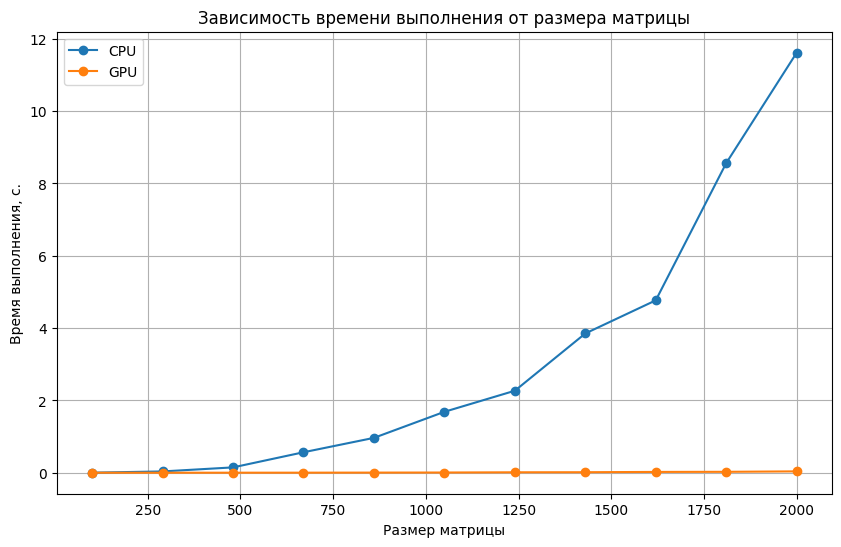

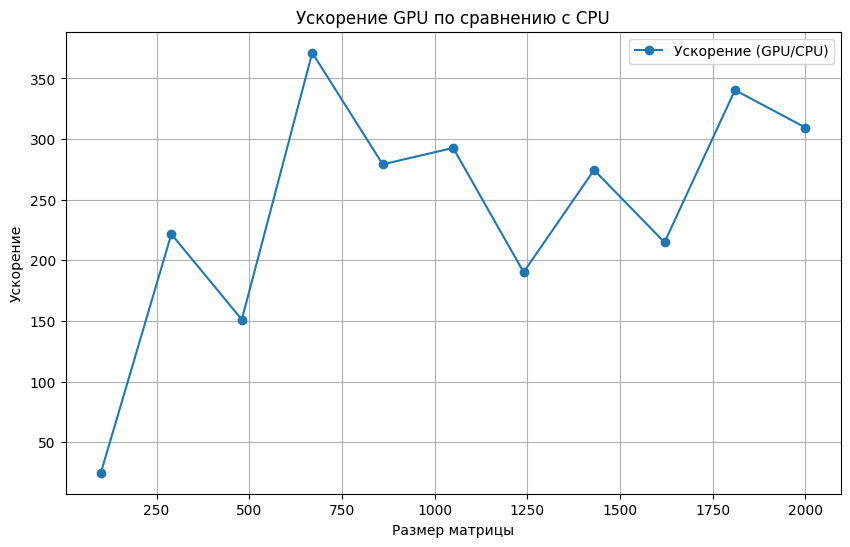

In [ ]:
solutions_c = [float(item) for item in open('my_list.txt')]

plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, solutions_c, label="CPU", marker='o')
plt.plot(matrix_sizes, solutions_g, label="GPU", marker='o')
plt.title("Зависимость времени выполнения от размера матрицы")
plt.xlabel("Размер матрицы")
plt.ylabel("Время выполнения, c.")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(matrix_sizes, [i / j for i, j in zip(solutions_c, solutions_g)], label="Ускорение (GPU/CPU)", marker='o')
plt.title("Ускорение GPU по сравнению с CPU")
plt.xlabel("Размер матрицы")
plt.ylabel("Ускорение")
plt.legend()
plt.grid(True)
plt.show()
